# AUTHOR : Mehboob Shaikh | DSML Sep-2022


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("Aerofit_treadmill.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


### 1 Defining Problem Statement and Analysing basic metrics (10 Points)

In [3]:
df.head() #checking top 5 rows

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.tail() #checking bottom 5 rows

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [5]:
df.info() # lets see null and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df.shape  # checking the shape of the data

(180, 9)

In [7]:
df.duplicated().sum() # checking the duplicate of the data

0

### Total unique values in each row

In [8]:
df.nunique().reset_index()

,index,0
0,Product,3
1,Age,32
2,Gender,2
3,Education,8
4,MaritalStatus,2
5,Usage,6
6,Fitness,5
7,Income,62
8,Miles,37


In [9]:
df.dtypes #get the type of data in dataframe

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

### summary statistics

In [10]:
df.describe() # let's see summary statstics

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### OBS

1. AGE OF CUSTOMER USING TREADMILL IS BETWEEN RANGE 18-50. AVERGAE AGE IS 28.78 AND
MEDIAN IS 26.
2. MAXIMUN INCOME OF TREADMILL USER IS 104K, AVERGAE INCOME APPROX IS 54K. WHILE
MEDIAN IS APPROX 51K.
3. EXPECTED TREADMILL USAGE IS ATLEAST ONCE MIN 1 ONCE A WEEK AND MAX IS 7 TIMES A
AWEEK, WITH OVERALL AVERAGE 3 TIMES.

### Check NULL Values

In [11]:
df.isna().any() # Cheching Null values

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

In [12]:
df.isna().sum() # Cheching Null values

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [13]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [14]:
df.value_counts()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles
KP281    18   Male    14         Single         3      4        29562   112      1
KP481    30   Female  13         Single         4      3        46617   106      1
         31   Female  16         Partnered      2      3        51165   64       1
                      18         Single         2      1        65220   21       1
              Male    16         Partnered      3      3        52302   95       1
                                                                                ..
KP281    34   Female  16         Single         2      2        52302   66       1
              Male    16         Single         4      5        51165   169      1
         35   Female  16         Partnered      3      3        60261   94       1
                      18         Single         3      3        67083   85       1
KP781    48   Male    18         Partnered      4      5        95508   180      1
Length: 1

### UNIQUE VALUES IN EACH COLUMNS

In [15]:
list_col=['Product', 'MaritalStatus','Usage',
       'Fitness', 'Education','Age', 'Gender', 'Income', 'Miles']
for col in list_col:
      print('{}{}' . format(col,df[col].unique()))

Product['KP281' 'KP481' 'KP781']
MaritalStatus['Single' 'Partnered']
Usage[3 2 4 5 6 7]
Fitness[4 3 2 1 5]
Education[14 15 12 13 16 18 20 21]
Age[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
Gender['Male' 'Female']
Income[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
Miles[112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


In [16]:
df['Product'].value_counts().reset_index()

,index,Product
0,KP281,80
1,KP481,60
2,KP781,40


In [17]:
df['Usage'].value_counts().reset_index()

,index,Usage
0,3,69
1,4,52
2,2,33
3,5,17
4,6,7
5,7,2


In [18]:
df['Fitness'].value_counts().reset_index()

,index,Fitness
0,3,97
1,5,31
2,2,26
3,4,24
4,1,2


In [19]:
df['Age'].value_counts().reset_index()

,index,Age
0,25,25
1,23,18
2,24,12
3,26,12
4,28,9
5,35,8
6,33,8
7,30,7
8,38,7
9,21,7


In [20]:
df['Education'].value_counts().reset_index()

,index,Education
0,16,85
1,14,55
2,18,23
3,15,5
4,13,5
5,12,3
6,21,3
7,20,1


### RANGE OF DATASET

There are 3 different treadmills products .
There are both Partnered and single customers .
Age of customers ranges from 18 to 50 .
Education in years is from 12 -21 .
Usage is from 2 days to 7 days a week .
Fitness level of customers from 1 -5


### TREADMIL VALUE COUNTS

In [21]:
# Which is most sold Model?
df.Product.value_counts().reset_index()

,index,Product
0,KP281,80
1,KP481,60
2,KP781,40


### Oberservation

Base Model KP281 is most sold MOdel and Higher end Model KP781

In [2]:
df.hist(figsize=(20,20))

NameError: name 'df' is not defined

### RELATIONSHIP BETWEEN PRODUCT AND GENDER USING COUNTPLOT AND CROSSTAB

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


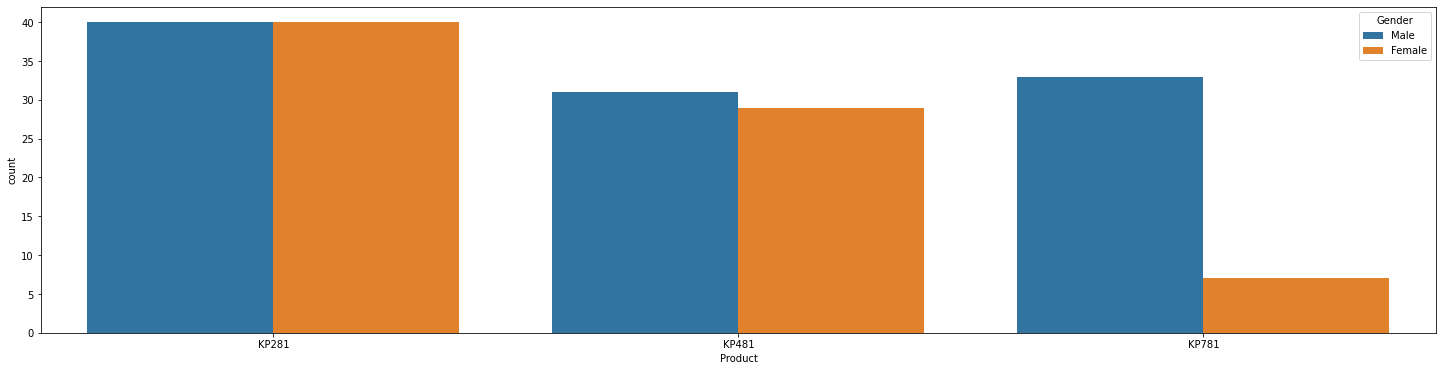

In [5]:
plt.figure(figsize= (25,6))
sns.countplot(x='Product', data= df, hue= 'Gender')


pd.crosstab(df['Product'], df['Gender'])

### OBSERVATION :
THE LOWER END MODEL HAS THE HIGHEST NUMBER OF FEMALE CUSTOMERS THE HIGHER END
MODEL HAS THE HIGHEST NUMBER OF MALE CUSTOMERS.

### BOX PLOT BETWEEN BOTH GENDER WITH REPSECT
TO AGE

<AxesSubplot:xlabel='Gender', ylabel='Age'>

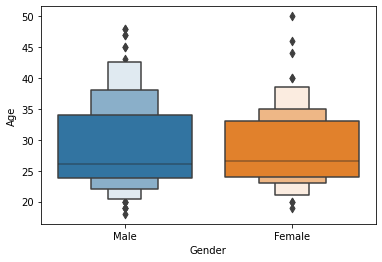

In [6]:
sns.boxenplot(x='Gender',y='Age',data=df)

### OBSERVATION :
1. YOUNGER FEMALES BUY MORE TREADMILLS COMPARED TO MALES
2. ELDER MALES BUY MORE TREADMILLS COMPARED TO FEMALES

### RELATIONSHIP BETWEEN PRODUCT AND MARITAL STATUS USING CROSSTAB

In [7]:
pd.crosstab(df['Product'],df['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


### OBSERVATION :
1. ITS IS EVIDENT THAT ALL PARTNERED BUY MORE THAN SINGLE CUSTOMERS IN ALL THE TYPES
OF TREADMILLS.

In [26]:
#Are Male customers buying treadmill more than female customers?
df.Gender.value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

OBSERVATION :
1. THERE ARE 82 MALE CUSTOMER ABD 72 FEMALE CUSTOMER
2. MALES ARE HIGHEST NUMBER OF CUSTOMERS.


In [27]:
df.MaritalStatus.value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

OBSERVATION :
1. THERE ATE 87 PARTERED CUSTOMERS AND 67 SINGLE CUSTOMERS
2. THERE ARE HIGH NUMBER OF PARTNERED CUSTOMERS.

In [28]:
df[df['Product']=='KP281'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


### OBSERVATIONS :
1. 80 CUSTOMERS BROUGH THE KP281 MODEL.
2. AVERAGE AGE OF CUSTOMER WHO BROUGHT THIS MODEL IS 28.5 AND MEDIAN IS 26
3. AVERAGE EDUCATION IS 15 AND MEDIAN IS 16
4. EXPECTED USAGE IS 3 DAYS A WEEK.
5. EXPECTED MILES TO RUN IS ON AVERGAE 82.78 PER WEEK AND MEDIAN IS 85
6. SELF RATED FITNESS IS 3
7. AVERAGE INCOME LEVEL IS 46K DOLLAR.


In [29]:
df[df['Product']=='KP481'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.0,26.0,33.25,48.0
Education,60.0,15.116667,1.222552,12.0,14.0,16.0,16.00,18.0
Usage,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.0,3.0,3.00,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.5,49459.5,53439.00,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.0,85.0,106.00,212.0


### OBSERVATIONS :
1. THERE ARE 6O CUSTOMERS WHO PURCHASED THIS MODEL.
2. AVERAGE AGE OF CUSTOMERS WHO PURCAHSED THIS MODELIS 28.9 , MEDIAN IS 26
3. CUSTOMER RANGE IS BETWEEN 24 - 33
4. AVERAGE EDUCTAION IS 15 AND MEDIAN IS 16
5. EXPECTED USAGE IS 3 DAYS A WEEK
6. EXPECTED MILES TO RUN IS 87.9 MILES PER WEEK AND MEIDAN 85
7. AVERAG INCOME IS 48K
8. MEDIAN INCOME IS 49K

In [30]:
df[df['Product']=='KP781'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.100,6.971738,22.0,24.75,27.0,30.25,48.0
Education,40.0,17.325,1.639066,14.0,16.00,18.0,18.00,21.0
Usage,40.0,4.775,0.946993,3.0,4.00,5.0,5.00,7.0
Fitness,40.0,4.625,0.667467,3.0,4.00,5.0,5.00,5.0
Income,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.00,104581.0
Miles,40.0,166.900,60.066544,80.0,120.00,160.0,200.00,360.0


### MARGINAL RPOBABILTIES

### P(MALE) = NUMMBER OF MALE CUSTOMERS /TOTAL NUMBER CUSTOMER

In [31]:
total = df.shape[0]
mf = df
mf = mf[mf['Gender']=='Male']
m=mf.shape[0]  # number of male customers

# p[M]
pmale=round((m/total),2)
pmale

0.58

### Marginal Male Probabilities is 0.58

### 2. p(single female ) =
P(SINGLE FEMALE) = TOTAL SINGLE FEMALE / TOTAL
CUSTOMER

In [32]:
sfm = df
sfm = sfm[sfm['Gender']=='Female']
sfm = sfm[sfm['MaritalStatus']=='Single']
f = sfm.shape[0]

psinglefemale = round(f/total,4)
psinglefemale

0.1667

### marginal probability of single female 0.1667


### P(KP781) = ?

In [33]:
kp = df
kp = kp[kp['Product']=='KP781']
k = kp.shape[0]
kp781 = round(k/total,2)
kp781

0.22

### Probability of KP781 is 0.22

### CONDITIONAL PROBABILITY
1. WHAT IS THE PROBABILTY THAT A CUSTOMER
BROUGHT A KP 281 MODEL GIVEN THAT SHE IS
SINGLE FEMALE ?
P(A=K281/B = SINGLE FEMALE )
P(A/B) = P(A ∩ B)/P(B)


In [34]:
# P(A = MODEL IS K281 / B = SINGLE FEMALE)

In [35]:
def conditional_proabaility(a, b) :
    cf= pd.crosstab(index=df["Product"], columns=[df["MaritalStatus"],df["Gender"]]) 
    cfnew = cf[b]
    total = cf[b].sum()
    print(total,cfnew.loc[a])
    print(cfnew.loc[a]/total)
conditional_proabaility(a = 'KP281', b =('Single', 'Female'))

30 13
0.43333333333333335


### conditional probability of model is kp281 when
customer is single female is = 0.43333333333

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

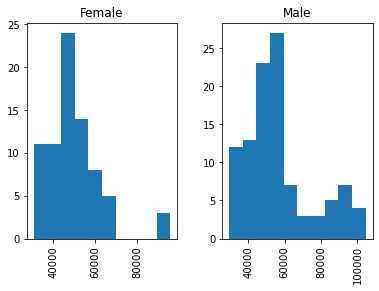

In [36]:
### HISTOGRAM PLOT OF INCOME COLUMN FOR BOTH THE GENDERS
df.hist(by='Gender', column='Income')

### OBSERVATIONS :
1. THERE ARE MANY HIGH INCOME MALES AND VERY FEW HIGH INCOME FEMALES.

### MEAN MODE AND MEDIAN OF AGE COLUMNS

In [37]:
df['Age'].mean()

28.788888888888888

In [38]:
df['Age'].mode()

0    25
Name: Age, dtype: int64

In [39]:
df['Age'].median()

26.0

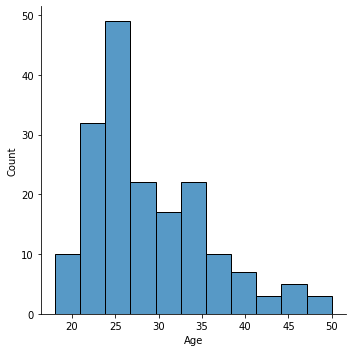

In [40]:
sns.displot(df['Age'])

### OBSERVATIONS :
1. MEAN OF THE CUSTOMERS IS 28
2. MODE OF THE CUSTOMERS IS 25
3. MEDIAN OF THE CUSTOMERS IS 26.0
4. THE MAHORITY OF THE CUSTOMERS WERE BETWEEN 20 TO 30

### COUNT PLOT OF DIFFERENT TREADMILLS WRT GENDER

<AxesSubplot:xlabel='Product', ylabel='count'>

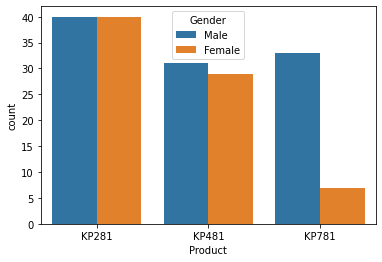

In [41]:
sns.countplot(x='Product', data= df, hue= 'Gender')

### OBSERVATION :
1. VERY FEW FEMALES ARE BUYING HIGH END MODELS
2. VERY HIGH NUMBER OF MALES ARE BUYING HIGH END MODELS

### PAIR PLOTS OF THE COLUMNS RELATIOSHIP

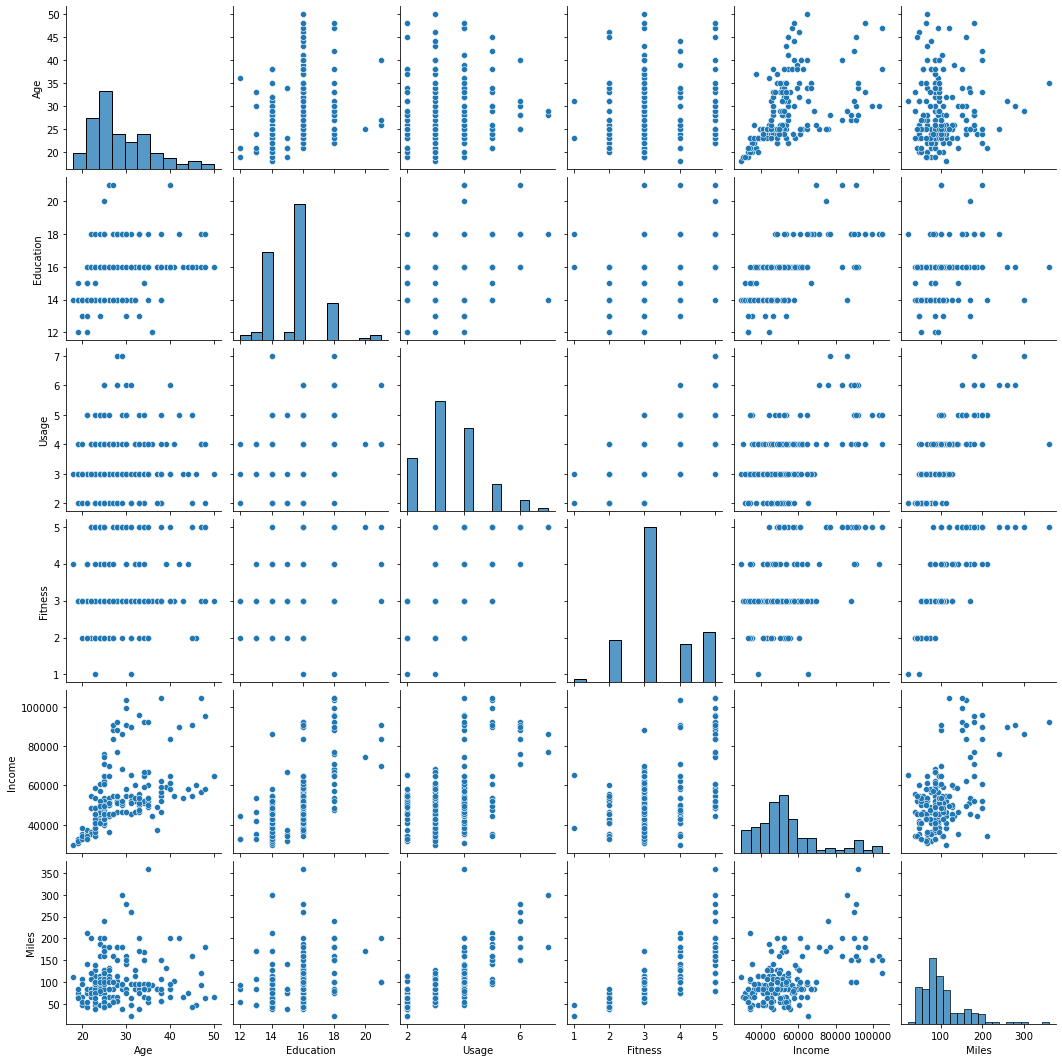

In [42]:
sns.pairplot(df)

### PAIR PLOTS OF THE COLUMNS RELATIOSHIP BETWEEN MARITALSTATUS

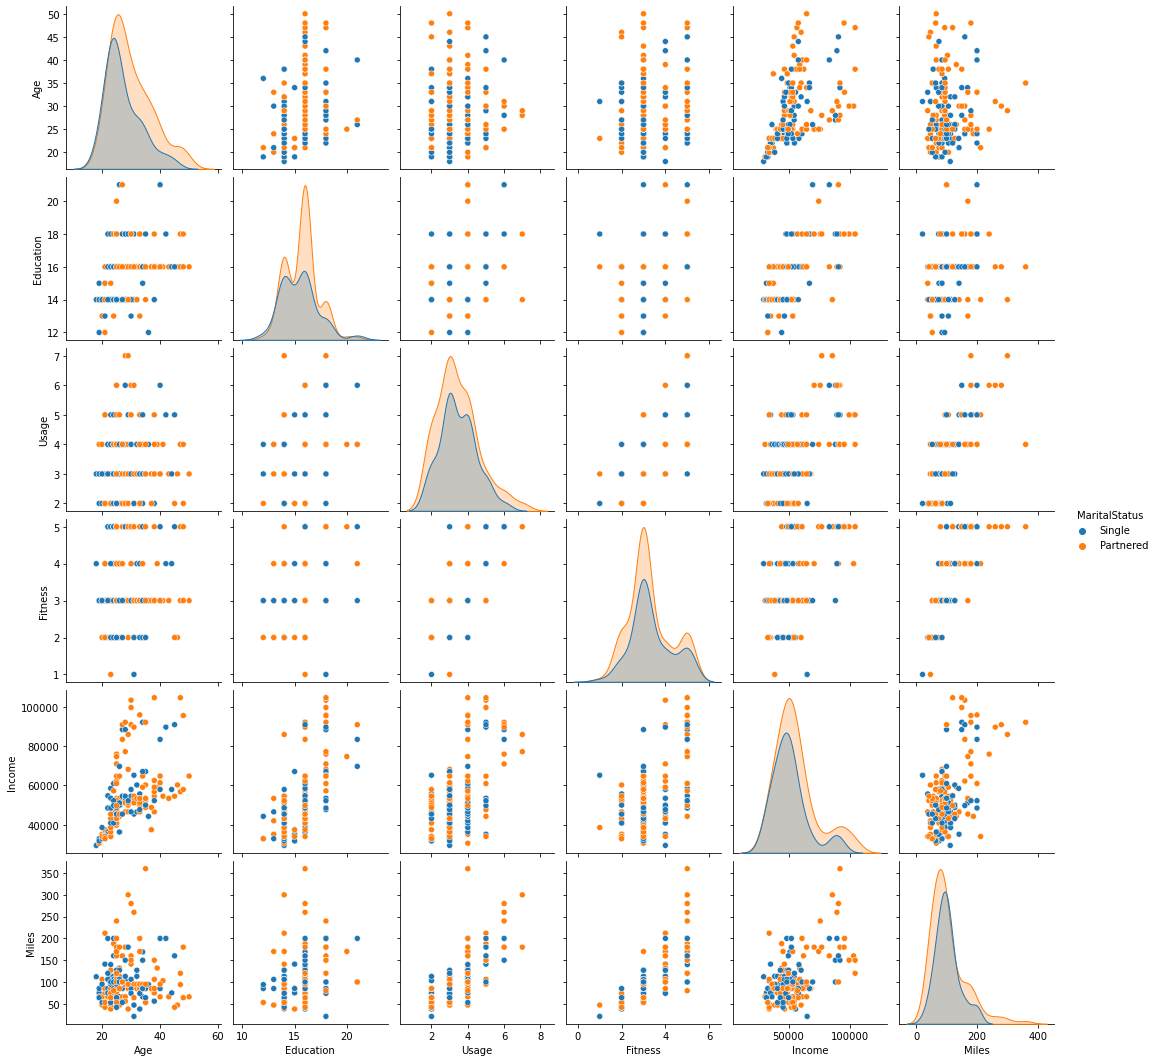

In [43]:
sns.pairplot(df, hue='MaritalStatus')

### CORRELATION GRAPH OF THE COLUMNS

In [44]:
corr= df.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

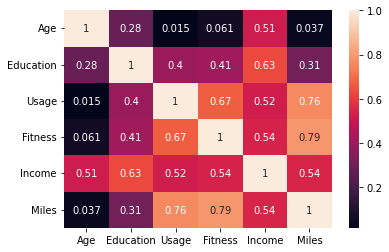

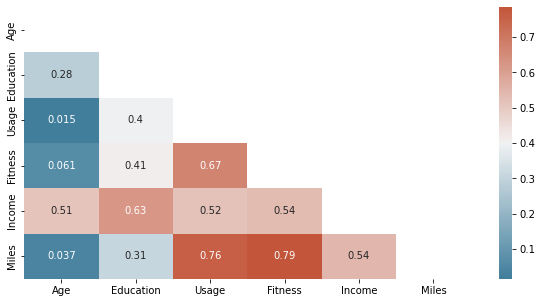

In [45]:
sns.heatmap(df.corr(), annot=True)

corr = df.corr()
f, ax = plt.subplots(figsize=(10, 5))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)


### OBSERVATIONS :
1. INCOME AND EDUCATION SHOW A GREAT REASON OF BUYING
2. USAGE AND FITNESS HAS THE GREAT CORRELATION AMONG THE REASON FOR BUYING
3. MILES RUNNED AN FITNESS LEVELS HAVE 79 PERCENT CORRELATION.

### SCATTERPLOT BETWEEN AGE AND INCOME

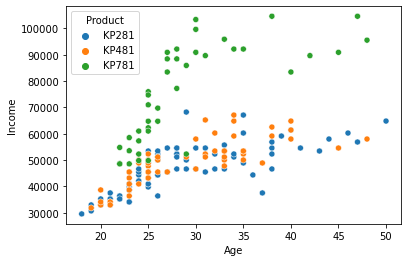

In [46]:
sns.scatterplot(data=df, x='Age', y='Income' , hue= 'Product')
plt.show()

### OBSERVATION :
1. HIGHER END MODELA RE BROUGHT NY HIGH INCOME CUSTOMERS
2. LOWER END MODELS AREE BROUGHT BY LOW INCOME CUSTOMERS

### DATA TYPE CONVERSION

In [47]:
#changing it to object dtype to category to save memory
df.Product=df["Product"].astype("category")
df.Gender=df["Gender"].astype("category")
df.MaritalStatus=df["MaritalStatus"].astype("category")

### CONERVSION TO CATEGORY DATATYPE

In [48]:
#get the type of data in dataframe
df.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

### PLOTTING BOX PLOT ,VIOLINPLOT AND HSITOGRAM OF COLUMNS

In [49]:
def dist_box_violin(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig, axes =plt.subplots(1,3,figsize=(17, 7))
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.distplot(data,kde=False,color='Blue',ax=axes[0])
    axes[0].axvline(data.mean(), color='y', linestyle='--',linewidth=2)
    axes[0].axvline(data.median(), color='r', linestyle='dashed', linewidth=2)
    axes[0].axvline(data.mode()[0],color='g',linestyle='solid',linewidth=2)
    axes[0].legend({'Mean':data.mean(),'Median':data.median(),'Mode':data.mode()})
    sns.boxplot(x=data,showmeans=True, orient='h',color="purple",ax=axes[1])
    #just exploring violin plot
    sns.violinplot(data,ax=axes[2],showmeans=True)

### INCOME

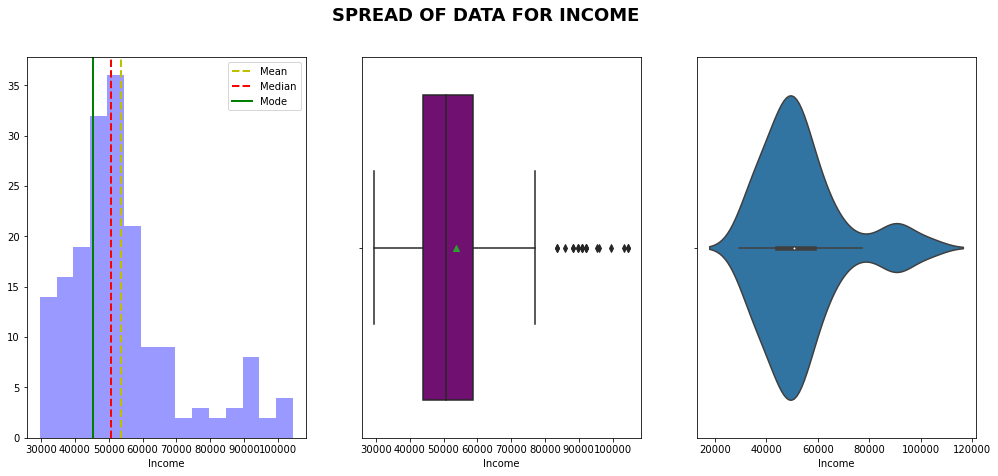

In [50]:
dist_box_violin(df.Income)


### OBSERVATIONS :
Income is skewed towards right , Median is 50K , Mean is 55k and mode is $45K. Most of the customers are in
lower pay range and earn less than 70K. Income has some outliers. Few customers earn beyond 80K.

### Age

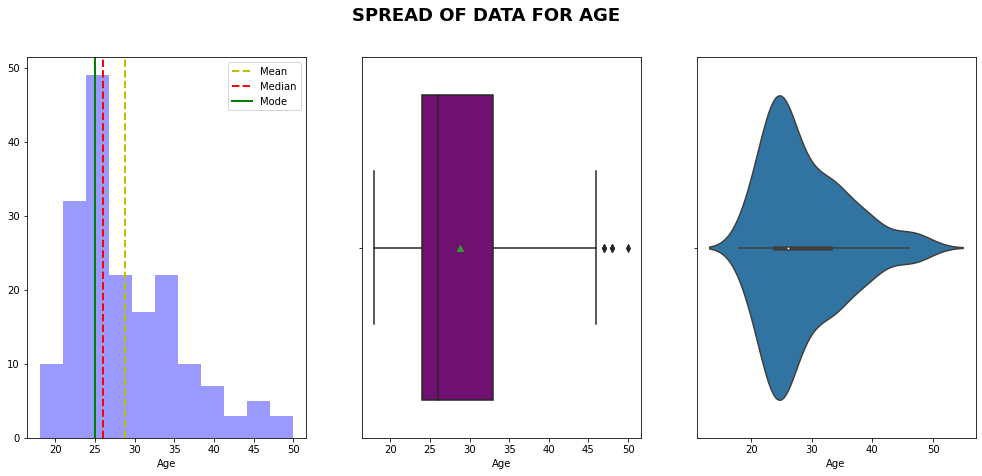

In [51]:
dist_box_violin(df.Age)

### Observations:
Age is skewed towards right. Customers buying treadmill are younger and average age of customer is 28 ,
median is 26 and mode is 25 Customers buying treadmill after age of 40 and before 20 are very less.


### Miles

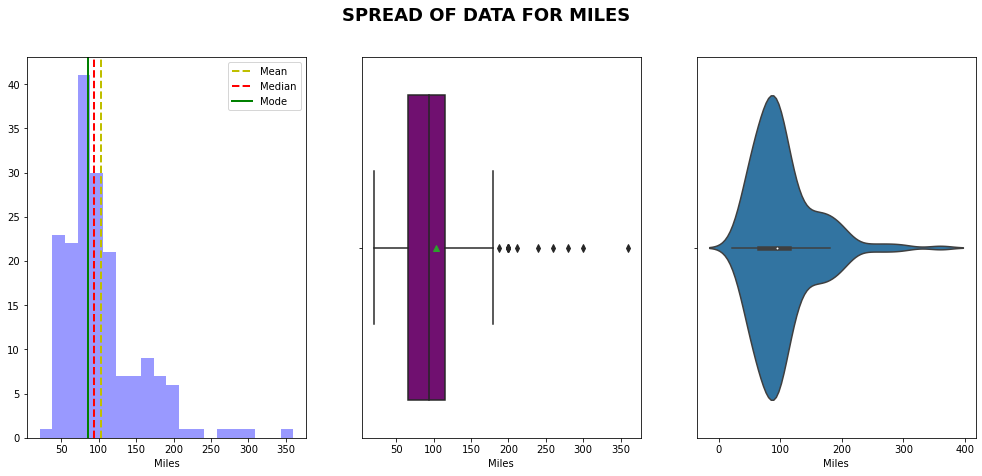

In [52]:
dist_box_violin(df.Miles)

### Observations:
Miles is skewed towards right. Customers expect to run on an average 80 miles per week. There are some
outliers, where customers are expecting to run more than 200 miles per weak.

### Fitness

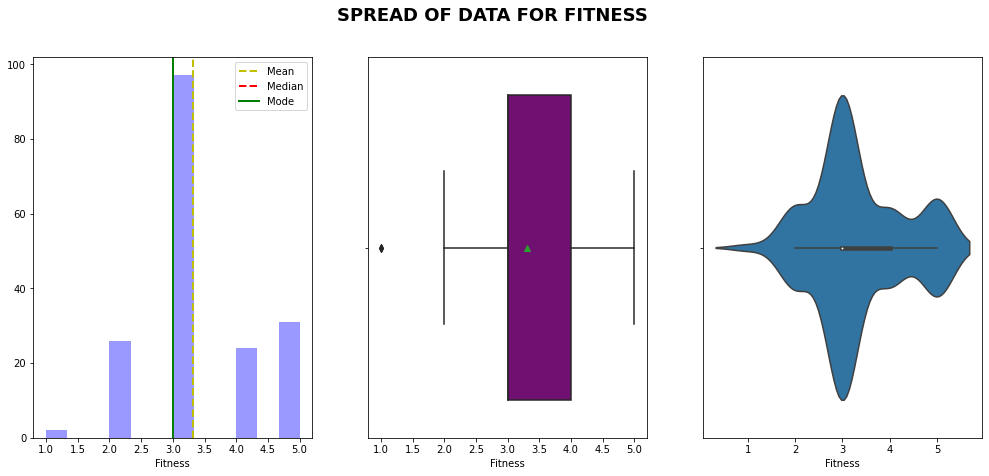

In [53]:
dist_box_violin(df.Fitness)


### Observations
Most of the customers have 16 year of education (assuming them to be college graduates or bachelors). There
are few outliers.


### Usage

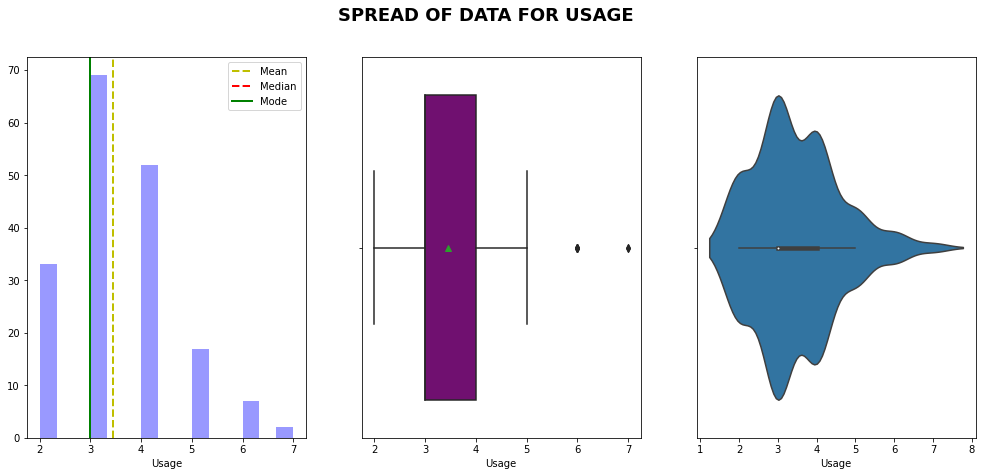

In [54]:
dist_box_violin(df.Usage)

### Observations
Most of customers expect they will be using the treadmill 3-4 days per week. There are few outliers where
customer are expecting to use treadmill for 6 or 7 times a week

### UNIVARIATE PIE CHART CATEGORICAL ANALYSIS

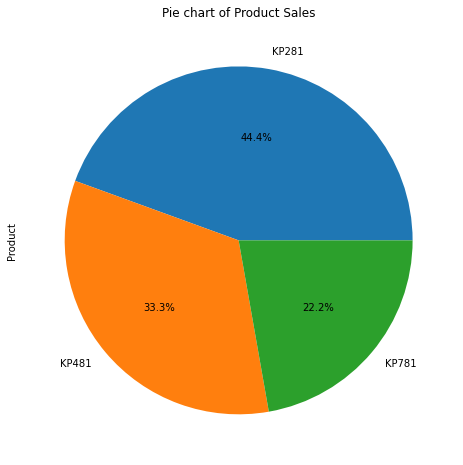

In [55]:
#Univariate Analysis
#categorical variables 
plt.figure(figsize=(14,7))
df['Product'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8))
plt.title("Pie chart of Product Sales")
plt.show()

### OBS :
1. MOST PEOPLE BROUGHT KP281
2. NEXT PEOPLE BROUGHT KP 481
3. LEAST BROUGHT NY KP 781


### Bi variate Analysis

### RELATIONSHIP BETWEEN MEAN OF AGE AND PRODUCT

In [56]:
#Average age of customer buying each model
df.groupby('Product')['Age'].mean()

Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

In [57]:
### RELATIONSHIP BETWEEN MEAN OF INCOME AND PRODUCT

In [58]:
#Average Income of customer buying each model
df.groupby('Product')['Income'].mean()

Product
KP281    46418.025
KP481    48973.650
KP781    75441.575
Name: Income, dtype: float64

In [59]:
### RELATIONSHIP BETWEEN MEAN OF MILES AND PRODUCT

In [60]:
#Average MILES of customer buying each model
df.groupby('Product')['Miles'].mean()

Product
KP281     82.787500
KP481     87.933333
KP781    166.900000
Name: Miles, dtype: float64

In [61]:
### RELATIONSHIP BETWEEN EACH(FEMALE AND MALE GENDER) AND PRODUCT

In [62]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(df['Product'],df['Gender'])
prd_gender

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


<Figure size 720x720 with 0 Axes>

### OBS :
1. FEMALES ARE BUYING KP 281
2. MALES ARE BUYING MORE KP 781


Text(0.5, 1.0, 'Product By Gender')

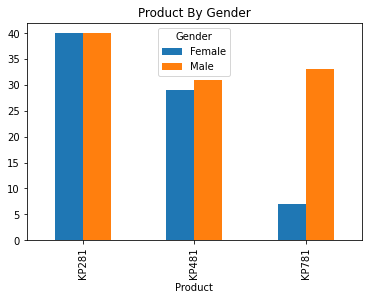

In [63]:
ax=prd_gender.plot(kind='bar')
plt.title("Product By Gender")


### Observation
KP281 model was equally bought my Male and Female Compared to females, male bought KP481 model .
KP781 model is popular in Males than in female.


### MARITAL STATUS HIST PLOT

MaritalStatus  Partnered  Single
Product                         
KP281                 48      32
KP481                 36      24
KP781                 23      17


Text(0.5, 1.0, 'PRODUCT BY MARTIAL STATUS')

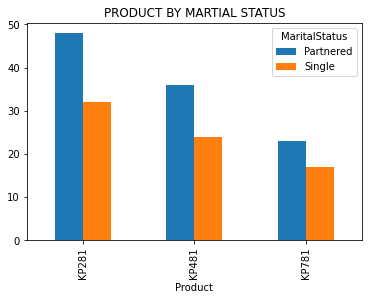

In [64]:
Marital_status = pd.crosstab(df['Product'],df['MaritalStatus'])
print(Marital_status)
Marital_status.plot(kind='bar')
plt.title("PRODUCT BY MARTIAL STATUS")

### CORRELATION WHRE GREATER THAN 0.5

In [65]:
corr_pairs = df.corr().unstack() # give pairs of correlation
corr_pairs[abs(corr_pairs)>0.5] # Gives us correlated data

Age        Age          1.000000
           Income       0.513414
Education  Education    1.000000
           Income       0.625827
Usage      Usage        1.000000
           Fitness      0.668606
           Income       0.519537
           Miles        0.759130
Fitness    Usage        0.668606
           Fitness      1.000000
           Income       0.535005
           Miles        0.785702
Income     Age          0.513414
           Education    0.625827
           Usage        0.519537
           Fitness      0.535005
           Income       1.000000
           Miles        0.543473
Miles      Usage        0.759130
           Fitness      0.785702
           Income       0.543473
           Miles        1.000000
dtype: float64

### Observation
Age and Income has some in significant correlation Education and Income has very little correlation There is
some corelation between Usage and Income Fitness and miles are corelated kp 781 model is correlated to
Education, Usage,Fitness, Income and Miles. Miles and usage are positively correlated

### BIVARIATE ANALSYSIS FOR PRODUCT VERSUS THE
REST OF THE FEATURES

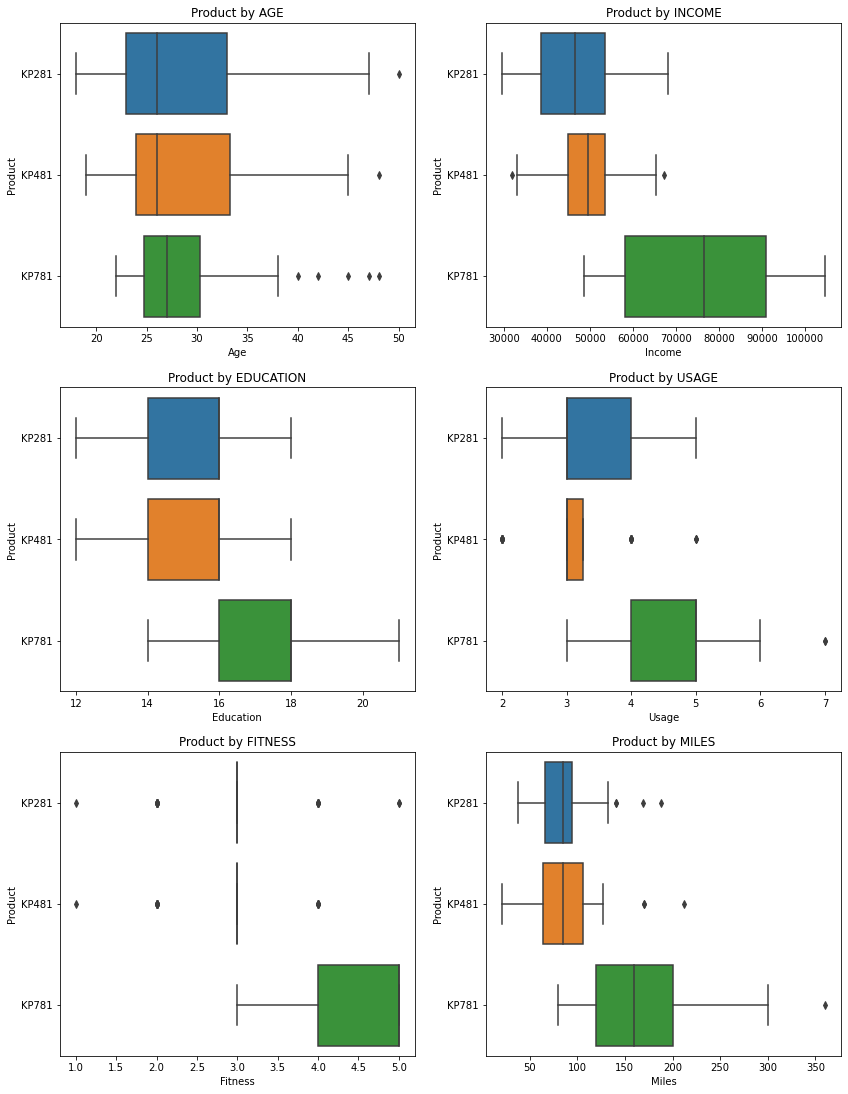

In [66]:
fig1, axes1 =plt.subplots(3,2,figsize=(14, 19))
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
#instead of writing  boxplot 6 times using for loop
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    
    sns.boxplot(df[list1_col[i]],df['Product'],ax=ax).set(title='Product by ' + list1_col[i].upper()  )

# Observations:-
1. There are many outliers for KP781 ,customers are more than age of 40 .
2. Age of customers buying KP281 and KP481 is between 20-35, where as customers buying kp 781 are
primarily in 25-30
3. Customers with higher income and more education have purchased kp 781 model.
4. Customers with lower income purchase KP281 and KP481 model may be because of cost of the Treadmill
5. Customer with KP281 expect to use treadmill 3-4 times a week and have average self rated fitness as 3
and some unfits.
6. Customers who bought KP481 model expecting to use Treadmill less frequently but to run more miles a
week.
7. Customer buying KP781 plan to use it more frequently , run more miles and have high self rated fitness
.They seem to be more health conscious or professionals.
8. KP781 model was purchased more by males customer than female customers

# BIVARIATE ANALYSIS FOR GENDER VS REST OF THE FEATURES

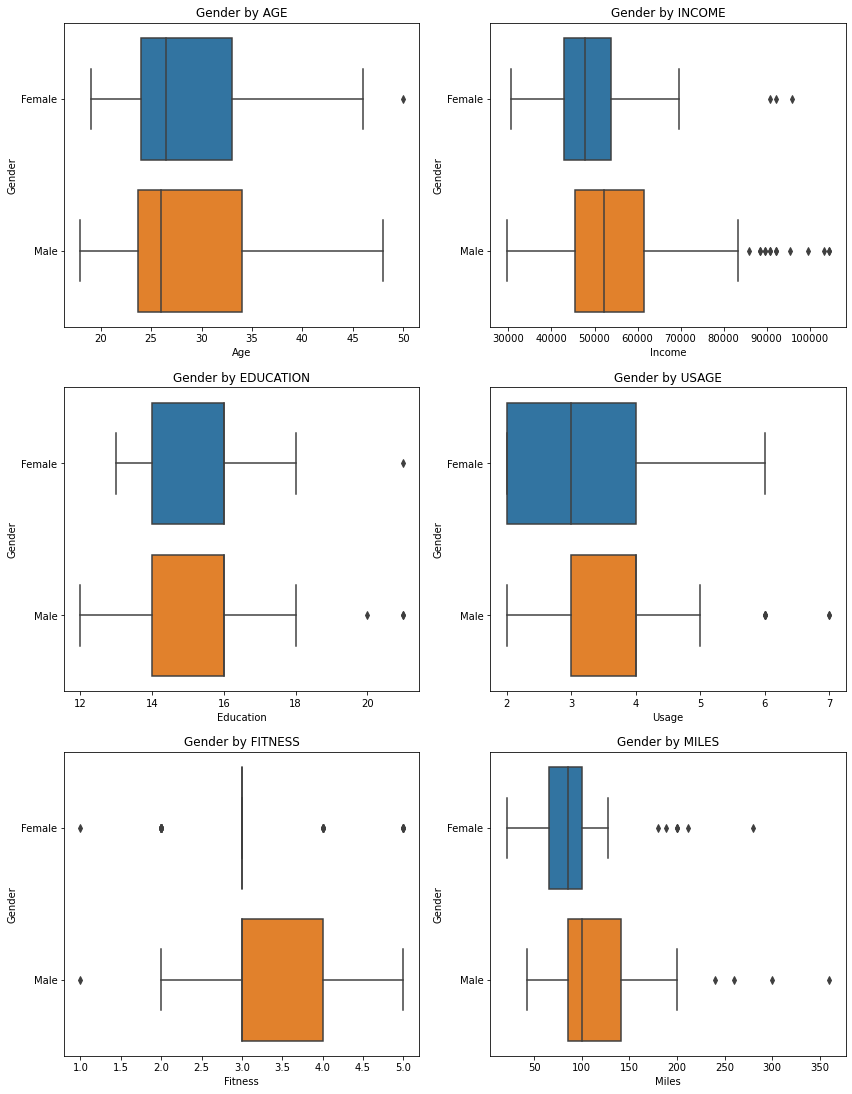

In [67]:
fig1, axes1 = plt.subplots(3,2, figsize=(14,19))
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    
    sns.boxplot(df[list1_col[i]],df['Gender'],ax=ax).set(title='Gender by '+list1_col[i].upper() )

# Observations:-
1. Male customers earn more than Female customers.
2. Males Customer have higher self rated fitness than female.
3. Expected Usage and miles covered on tread mill is less in Female customers than male customers.
4. Female in age range 23-33 purchased the treadmill.
5. Education of Male and Female customers is same

# BIVARIATE ANALYSIS FOR MARITAL STATUS AND REST OF THE FEATURE

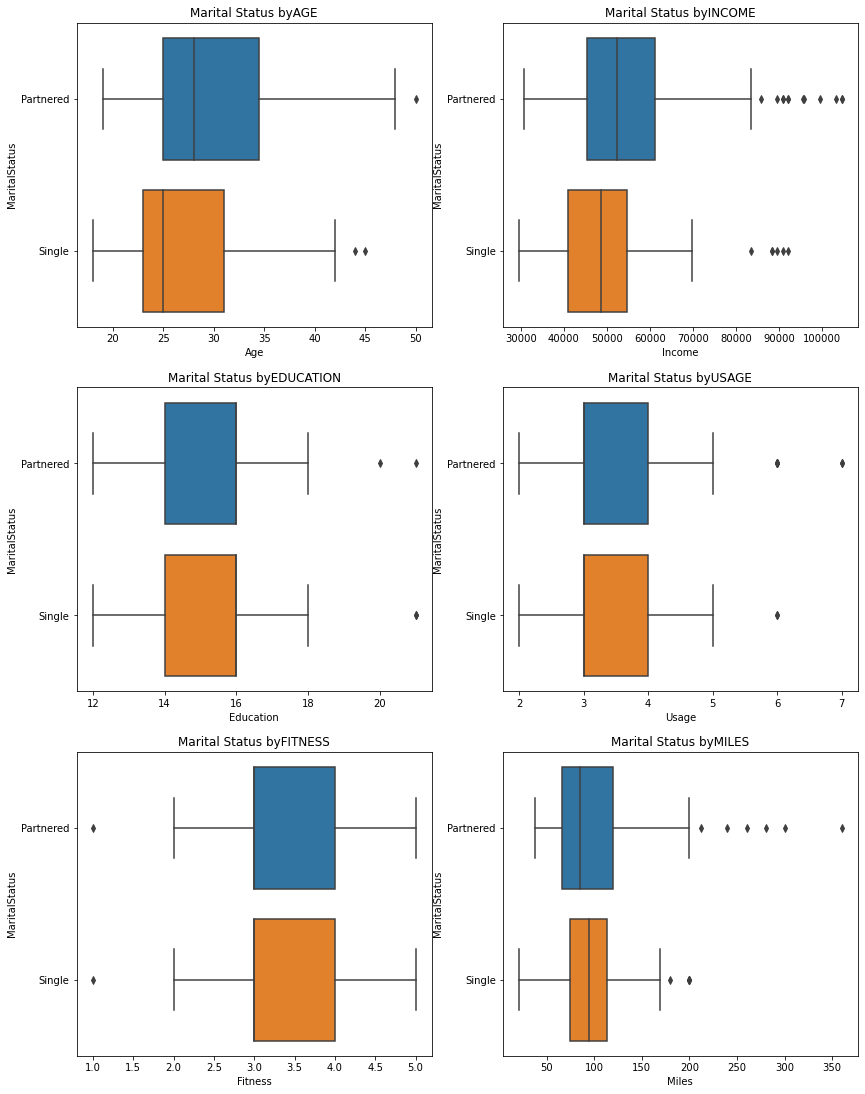

In [68]:
fig1, axes1 = plt.subplots(3,2, figsize=(14,19))
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    
    sns.boxplot(df[list1_col[i]],df['MaritalStatus'],ax=ax).set(title='Marital Status by'+list1_col[i].upper())

# Observations
1. Partnered customer expects to run more miles compared to single
2. Income of Partnered customer is more than income of single customer.
3. Age of Partnered customer is more than Age of single customer
4. There are more single males buying Treadmill than single Females
5. Self rated Fitness of both Partnered and Single customer are same.
6. Education of both Partnered and Single customer is same


# JOIN PLOT VS EDUCATION

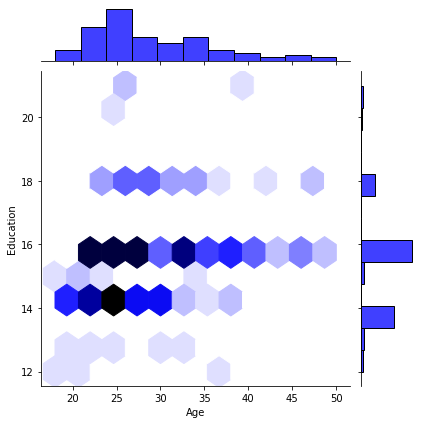

In [69]:
sns.jointplot(x='Age', y='Education', color = 'b',
data=df, kind='hex')

# Observation:-
1. Customer between age 20-40 have 14 -16 years of education

# POINTPLOT VS EDUCATION VS INCOME

<AxesSubplot:xlabel='Education', ylabel='Income'>

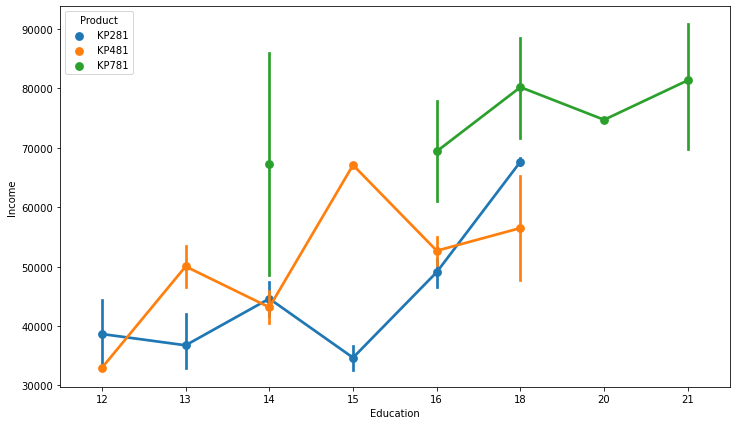

In [70]:
plt.figure(figsize=(12,7))
sns.pointplot(x='Education', y='Income',data=df, hue='Product')

# Observation:-
1. ducation and Income are correlated.
2. KP781 has higher income and higher education


# MULTIVARIATE ANALYSIS

<Figure size 864x504 with 0 Axes>

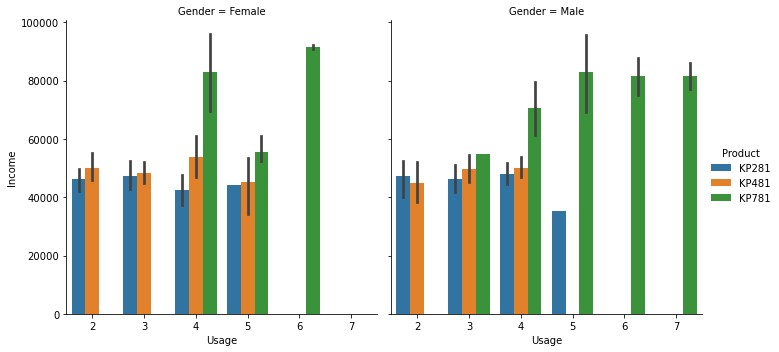

In [71]:
plt.figure(figsize=(12,7))
sns.catplot(x='Usage', y='Income', col='Gender', hue='Product', kind='bar',data=df )

# Observations
1. Male customer with higher income ,bought kp 781 Model and expect to use treadmill 4-6 /week
2. Customer who bought kp 281 and kp 481 are in same income range and expect to use treadmill 3-4 /week


# product vs marital status vs gender realtionship


In [72]:
prd_mar_gen = pd.crosstab(index=df['Product'],
                             columns=[df['MaritalStatus'],
                            df['Gender']])
prd_mar_gen

MaritalStatus Partnered      Single     
Gender           Female Male Female Male
Product                                 
KP281                27   21     13   19
KP481                15   21     14   10
KP781                 4   19      3   14

<AxesSubplot:xlabel='Product'>

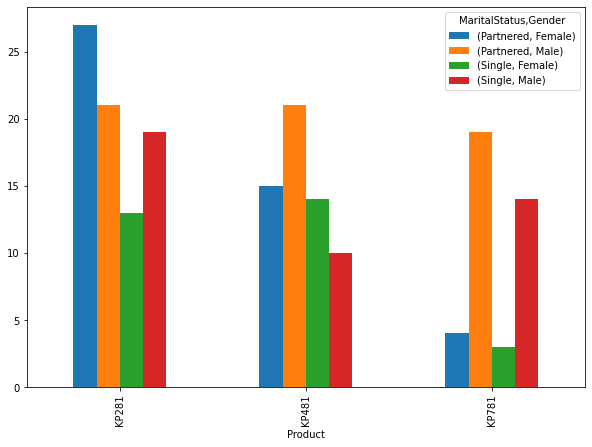

In [73]:
prd_mar_gen.plot(kind='bar', figsize=(10,7))

# observation :
1. PARTERNED FEMALE BUYED THE KP281
2. SINGLE MALE BROUGHT THE KP781 MODEL

# CATEGORICAL PLOT GENDER VS INCOME

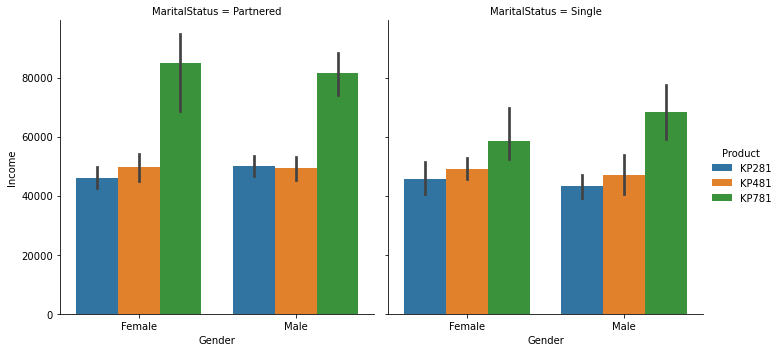

In [74]:
sns.catplot(data=df, x='Gender',y='Income' , hue='Product', kind='bar',col='MaritalStatus')

# Observations
1. Partnered Female bought kp 281 Model compared to Partnered male.
2. Single Female customers bought kp 481 model more than Single male customers.
3. Partnered Male customers bought kp 781 model more than Single Male customers.
4. There are more single males buying Treadmill than single Females.
5. Single Male customers bought kp 281 Model compared to Single Female.
6. Majority of people who buy the kp 781 are man & partnered.
7. The majority of our buyers are man.


# PRODUCT VS GENDER VS FITNESS RELATIONSHP


In [75]:
pro_gen_fit=pd.crosstab(index=df['Product'],columns=[df['Gender'],df['Fitness']])
pro_gen_fit

Gender  Female               Male              
Fitness      1   2   3  4  5    1  2   3  4   5
Product                                        
KP281        0  10  26  3  1    1  4  28  6   1
KP481        1   6  18  4  0    0  6  21  4   0
KP781        0   0   1  1  5    0  0   3  6  24

# OBS :
1. KP 281 HAS FEMALE WITH 3 FITNES AND MALE WITH 3 FITNESS HIGHEST
2. KP 781 HAS MALE WITH 5 FITNESS HIGHEST

# Relative plot between Income and Age

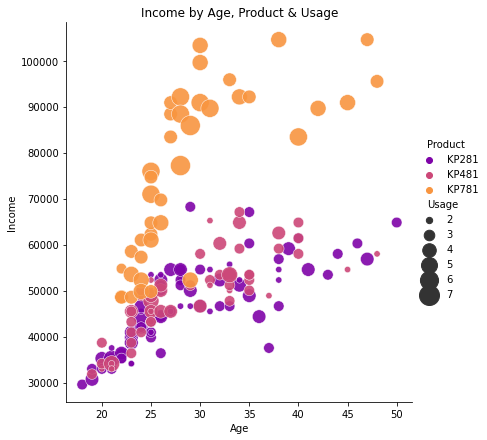

In [76]:
sns.relplot(x='Age', y='Income', hue='Product', size='Usage', alpha=.9,palette='plasma',
                sizes=(40, 400),height=6,data=df).set(title='Income by Age, Product & Usage')

# Observations:
1. Products KP281 and KP481 are bought by people with lower than 70K as income and age is concentrated
more in range of 23-35
2. Product KP781 is mainly bought by people with higher than 70K income and age falls in range of 23-30.
3. Majority of people who buys the KP781 expect that they will run more than consumers of the other two
products, on average.


# Dist plot of age

<AxesSubplot:xlabel='Age', ylabel='Density'>

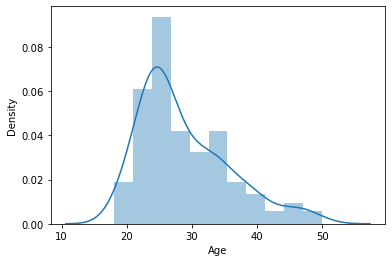

In [77]:
sns.distplot(df['Age'])

# HIST PLOT OF MODELS KP 281 KP481 AND KP 781 BY MILES


array([[<AxesSubplot:title={'center':'KP281'}>,
        <AxesSubplot:title={'center':'KP481'}>],
       [<AxesSubplot:title={'center':'KP781'}>, <AxesSubplot:>]],
      dtype=object)

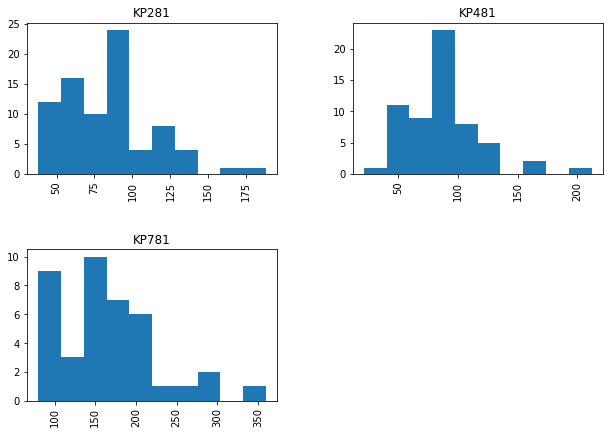

In [78]:
df.hist(by='Product',column='Miles',figsize=(10,7))

In [79]:
df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

# Scatter Plot

<AxesSubplot:xlabel='Age', ylabel='Miles'>

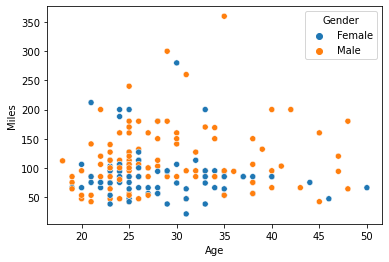

In [80]:
sns.scatterplot(data=df, x='Age', y= 'Miles', hue='Gender')

# Join Plot

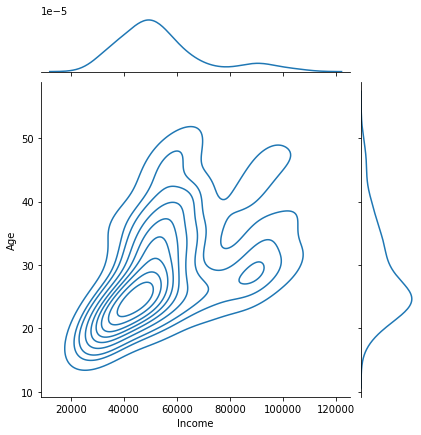

In [81]:
sns.jointplot(data=df, x='Income',y='Age', kind='kde')

# VIOLIN PLOT

<AxesSubplot:xlabel='Usage', ylabel='Age'>

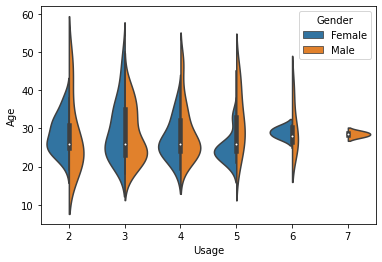

In [82]:
sns.violinplot(x='Usage', y='Age', data=df,split=True,hue='Gender')

# OUTLIER DETECTION

# BOXPLOT FOR OUTLIER DETECTION OF AGE AND HISTPLOT AND DISTPLOT

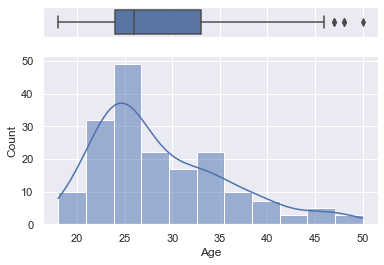

In [83]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df,x='Age', ax=ax_box)
sns.histplot(data=df, x="Age", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

# FINDING OUTLIER  BY FINDING UPPER AND LOWER LIMITS OF AGE COLUMN

In [84]:
# Treating Outliers
Q3 = df['Age'].quantile(0.75)
Q1 = df['Age'].quantile(0.25)
IQR = Q3-Q1
upper = Q3+(1.5*IQR)
lower = Q1-(1.5*IQR)
print(upper,lower)

46.5 10.5


# REMOVE AGE OUTLIERS

In [85]:
df = df[(df['Age']>lower) & (df['Age']<upper)]

# NEW GRAPH WITHOUT AGE OUTLIERS

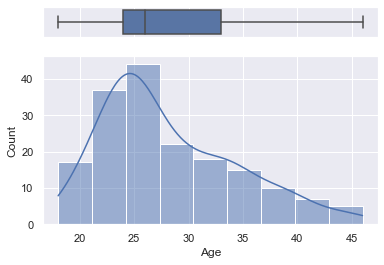

In [86]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df,x='Age', ax=ax_box)
sns.histplot(data=df, x="Age", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

# OBSERVATIONS :
1. Mean age of the buyers is aroud 26
2. 25% of the age is around 25
3. 75% of the age is around 33

# COUNTPLOT OF MARITAL STATUS


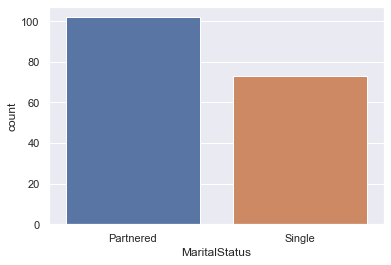

In [87]:
sns.countplot(data=df, x='MaritalStatus')
plt.show()

# COUNT PLOT OF USAGE


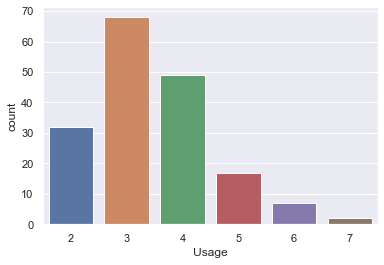

In [88]:
sns.countplot(data=df, x='Usage')
plt.show()

# SCATTERPLOT OF INCOME VS AGE


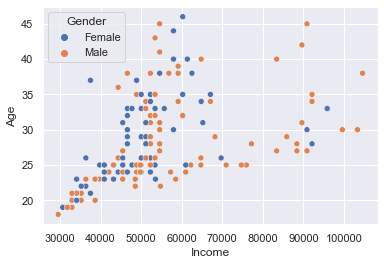

In [89]:
sns.scatterplot(data=df, x='Income', y='Age', hue="Gender")
plt.show()

# OBSERVATION :
1. Most of the women earns less than males
2. We can see a positive trend which means as age increases the income increases

# LINE PLOT OF AGE VS INCOME

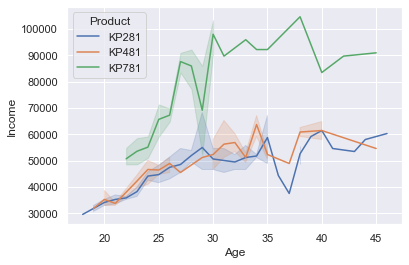

In [90]:
sns.lineplot(data=df, x='Age', y='Income', hue='Product')
plt.show()

# OBSERVATIONS
1.From earlier graph we saw that persons with higher income buys more KP781 and with age income
increases, but with closer look we can see that more income people with less age is buying the KP781 more
KP481 and KP281 is more or the same across various buyers

# COUNT PLOT OF USAGE VS PRODUCT

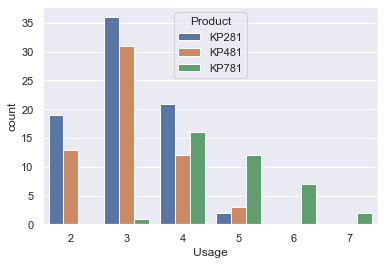

In [91]:
sns.countplot(data=df, x='Usage', hue='Product')
plt.show()

# OBSERVATIONS :
1. Most of the buyers are have a usage rating 2,3 or 4
2. KP281 is more bought by the buyers with usage rating less than 4
3. KP781 is more bought by the users with usage more than 4

In [92]:
# COUNT PLOT MARITAL STATUS VS PRODUCT

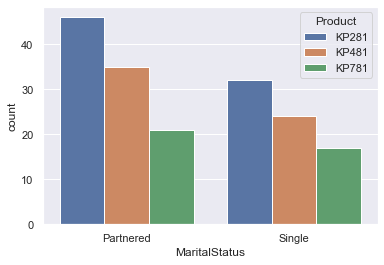

In [93]:
sns.countplot(data=df, x='MaritalStatus', hue='Product')
plt.show()

# OBSERVATIONS :
1. Most of the buyers are Partnered
2. And among both the Status we can see there is a same trend kp 281 most favourable and kp 781 is leastv


# NUMBER OF CUSTOMER PER MARITAL STATUS ABD GENDER AND PRODUCT

In [94]:
df.groupby(['MaritalStatus','Gender','Product']).Usage.count()

MaritalStatus  Gender  Product
Partnered      Female  KP281      26
                       KP481      15
                       KP781       4
               Male    KP281      20
                       KP481      20
                       KP781      17
Single         Female  KP281      13
                       KP481      14
                       KP781       3
               Male    KP281      19
                       KP481      10
                       KP781      14
Name: Usage, dtype: int64

# NUMBER OF CUSTOMER GENDER AND PRODUCT

In [95]:
df.groupby(['Gender','Product']).Usage.count()

Gender  Product
Female  KP281      39
        KP481      29
        KP781       7
Male    KP281      39
        KP481      30
        KP781      31
Name: Usage, dtype: int64

# OBSERVATIONS -
1. KP481 is bought more by Single females
2. KP281 remains good choice for Partnered females
3. A partnered male is equally likely to buy KP281 and KP481
4. Single male is more likely to buy either KP281 or KP481


# CUSTOMER PROFILING

# Age
1. Age is skewed towards right.
2. Customers buying treadmill after age of 40 and before 20 are very less.


# Education
3. Most customers have 16 years of Education.
4. There are few outliers (higher end).

# Usage
5. Most user loves to use Treadmills 3-4 week.
6. There are few outlier (Higher end).

# Fitness
7. Most customer have 3-3.5 fitness rating (moderate fit)
8. Very few customers that uses treadmill have low score i.e 1 that a great new;)

# Income
9. Income is skewed toward right.
10. Income may have outliers (higher end) as there are very few persons who earn >80k.
11. Most customers have income less than 70k.


# Miles
12. Miles is skewed towards right.
13. Customers run on an average 80 miles per week.
14. There are some outliers, where customers are expecting to run more than 200 miles per week.


# Customer Profiles MODEL WISE
# For model KP 281

1. Customers who bought this treadmill have income less than 60k with an average of 55K.
2. This model has same level of popularity in Male customers as well as Female customers as it has same
numbers of Male and Female customers.
3. Average age of customer who purchases KP 281 is 28.5.
4. This model is popular among Bachelors as average years of education of customers for this product is 15.
5. Self rate fitness level of customer is average.
6. Customers expect to use this treadmill 3-4 times a week.
7. It is the most popular model (in all genders) because of its appealing price and affordability with 33.3% of
sales.
8. Customers who bought this treadmill want fitness level atleast average and maybe they were looking for a
basic treadmill with appealing price that also does the job.

# For model KP 481
1. This model is second most sold model with 33.3% of sales.
2. Customers with lower income purchase KP281 and KP481 model may be because of lower cost of the
Treadmill.
3. Average age of customer who purchases KP481 is 29.
4. This model is popular among Bachelors as average years of education of customers for this product is 16.
5. Customers expecting KP 481 model to use less frequently but to run more miles per week on this.
6. This model is popular more in Single Female customers compare to Single male customers may be
because of difference in provided features or color scheme.

# For model KP 781
1. This is the least sold product(22.2% sales) in company lineup of Treadmill may be because of it heafty
price range making it Company's Premium product.
2. This model is popular with customers having high income range as average Income is 75K .
3. Average age of customer who purchases KP 781 is 29.
4. This model is popular among Customers with higher education as average education is 17 years.
5. Treadmill may have some advanced features as people with high income are ready to spend money to buy
this model
6. Customers expected usage on this model is 4-5 day a week with moderate Miles to run having average
166 miles per week.
7. Male customers who are more serious about fitness or Professionals buy this mode (self fitness rating 3-5).

# OTHER OBSERVATIONS :
1. Partnered Female bought kp 281 Model compared to Partnered male.
2. Partnered Male customers bought KP 281 & KP 781 models more than Single Male customers.
3. Single Female customers bought KP 481 model more than Single male customers.
4. Single Male customers bought KP 281 & KP 781 models compared to Single females.
5. The majority of treadmill buyers are man.

# Conclusion :
6. KP 281 model is the most purchased model (44.4%) then KP 481 (33.3%). KP 781 is the least sold model
(22.2%).
7. There are more Male customers (57.8%) than Female customers (42.2%).
8. Average Usage of Males is more than Average usage of Females.
9. Customers buying treadmill are younger and average age of customer is 28.
10. Most of the customers earns less than 70K and prefer KP 281 & KP 481 models.
11. 59.4% of the customers who purchased treadmill are partnered.
12. Customers average education is 16.

# RECOMMENDATIONS
1. TARGET LOW INCOME PARTNERED FEMALES AND TARGET THEM FOR KP 281 MODELS.
2. CUSTOMER HAVING 3 FITNESS RATING SHOULD BE TARGET FOR KP 281 MODELS
3. KP 781 MODELS SHOULD BE TARGERED FOR HIGH INCOME PARTENRED 5 FITNESS LEVEL
MALES
4. IRRESPECTIVE GENDER SCEANRIO, KP 281 IS THE BEST MODEL TO SUIT THE MAJORITY
CUSTOMERS
5. EDUCATION WITH 14 TO 16 YEARS HAVE TENDENCY TO BUY MORE OF KP 281 MODELS


# Recommendations For Better Insights:
1. Look at profit by product model to better understand sales percentages
2. Gather information on fitness goals: lose weight, better cardio health, maintain, etc.
3. Gather information on partner to gain second half of story on partnered customers.
